In [15]:
# Apenas para filtrar warnings

import warnings 
warnings.filterwarnings("ignore")

#Biblioteca de DS

import pandas as pd
import seaborn as sns

#Separação dos  dados

from sklearn.model_selection import train_test_split

#Padronização de dados

from sklearn.preprocessing import StandardScaler

#Modelos a serem utilizados

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor

#Métrica de avaliação

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["class"] = iris.target

data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     class  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
145      2  
146      2  
147      2  
148      2  
149      2  

[150 rows x 5 columns]

In [17]:
X = data.drop(columns=["class"])
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)

In [18]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [22]:
#Matrize de confusão do perceptron

from sklearn.metrics import confusion_matrix
def matriz_confusao(teste_labels, teste_predicoes, classes):
  cm = confusion_matrix(teste_labels, 
                        teste_predicoes, 
                        labels=classes)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                display_labels=classes)
  disp.plot(cmap="Blues")

def gera_modelos(xtr, xts, ytr, yts):

  #Perceptron
  p = Perceptron(random_state=42)
  p.fit(xtr, ytr)

  y_pred = p.predict(xts)

  print(f"ACC Perceptron: {round(accuracy_score(y_pred, yts), 2)}")
  matriz_confusao(yts, y_pred, p.classes_)

  #MLP
  mlp = MLPClassifier(
      hidden_layer_sizes=(5,),
      random_state=1,
      solver="lbfgs"
  )
  mlp.fit(xtr, ytr)

  y_pred = mlp.predict(xts)

  print(f"ACC Perceptron: {round(accuracy_score(y_pred, yts), 2)}")
  matriz_confusao(yts, y_pred, mlp.classes_)


ACC Perceptron: 0.63
ACC Perceptron: 0.3


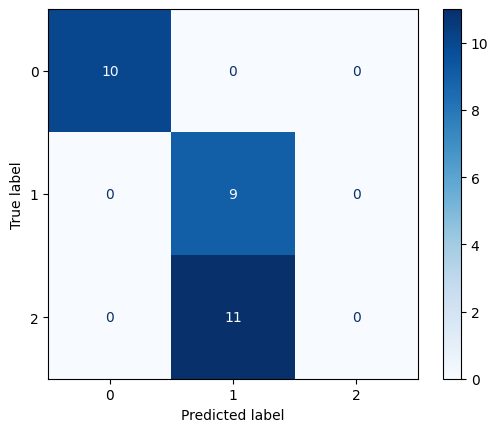

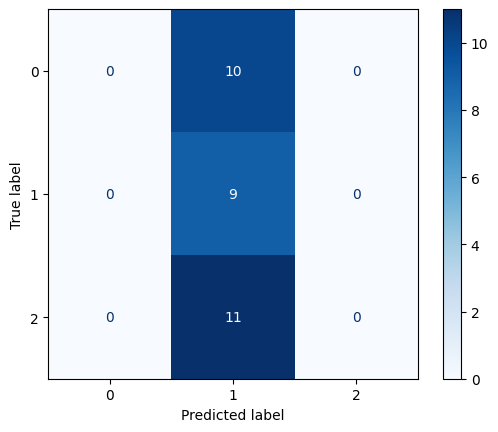

In [23]:
# Gerar os resultados com os dados "Brutos"
gera_modelos(X_train, X_test, y_train, y_test)

ACC Perceptron: 0.93
ACC Perceptron: 0.9


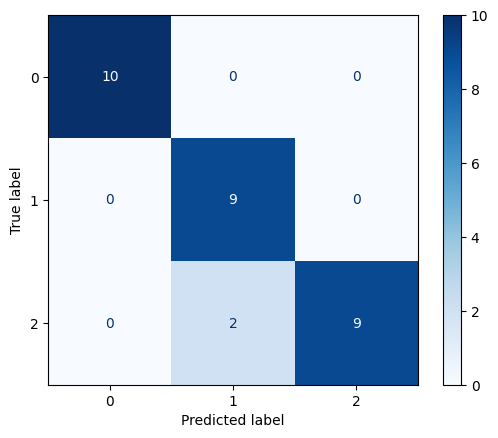

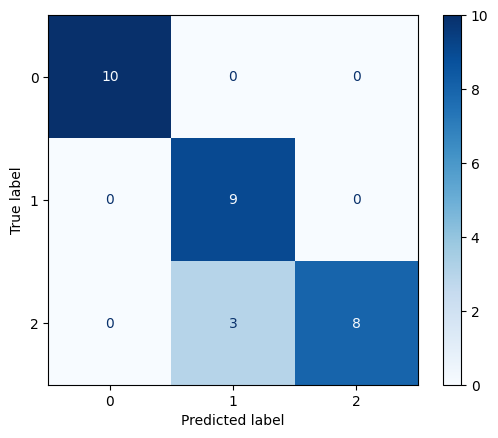

In [24]:
# Gera os modelos com os dados PADRONIZADOS
gera_modelos(X_train_scaled, X_test_scaled, y_train, y_test)

In [40]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data["label"] = housing.target

data

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  label  
0        -122.23  4.526  
1        -122.22  3.585  
2        -122.24  3.521  
3        -122.25  3.413  
4        -122.25  3.422  
...          ...    ...  
20635    -121.09  0.781  
20636    -121.21  0.771  
20637    -121.22  0.923  
20638    -121.32  0.847  
20639    -121.24  0.894  

[20640 rows x 9 columns]

In [41]:
X = data.drop(columns=["label"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [44]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(X_train)
x_test_ss = ss.transform(X_test)

In [ ]:
def modelo_regressao(xtr, xts, ytr, yts):
  mlp = MLPRegressor(
      hidden_layer_sizes=(5,),
      random_state=1,
      max_iter=50
  )
  mlp.fit(xtr, ytr)
  y_pred = mlp.predict(xts)

  print(f"MSE: {round(mean_squared_error(y_pred, yts), 2)}")
  print(f"MSE: {round(mean_absolute_error(y_pred, yts), 2)}")

In [ ]:
# Dados Padronizados
modelo_regressao(x_train_ss, x_test_ss, y_train, y_test)